## Lab 5 - Categorization

This lab must be done **individually**. The required packages have been imported for you below.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import spatial  
from sklearn.model_selection import LeaveOneOut

Data adapted from Leuven Concept Database (De Deyne et al., 2008).

Extract data from file.

In [4]:
df = pd.read_csv('data-categorization.csv')

Get feature list.

In [5]:
features = list(df.features)
features.remove('category')

Get names of all animals.

In [6]:
names = list(df); del names[0]

Get binary feature matrix (animal-by-feature).

In [7]:
F = pd.read_csv("data-categorization.csv", header=0, usecols=list(np.arange(1,54)))
F = np.asarray(F)

Get category labels.

In [8]:
labels = F[len(F)-1,:]

Config `F` such that each row is feature vector of one animal.

Each column is either a bird (category label = 0) or a fish (category label = 1).

In [9]:
F = np.delete(F,len(F)-1,0) 
F = np.transpose(F)

You should have the following variables:

(**Hint**: Print them out to see what they are).

1. Main variables you'll need for analysis:
    - `F`:        53-by-44 binary matrix, i.e. 53 animal exemplars (30 birds and 23 fish) and 44 features
    - `labels`:   53 binary category labels (0 for bird; 1 for fish), i.e. ground truth that you'll predict
    
    
2. Auxillary variables
    - `names`:    53 animal names
    - `features`: 44 feature names

### Data visualization (not assessed)

Run the code below to visualize the animals in two dimensions, via multi-dimensional scaling.

Text(0, 0.5, 'Dimension 2')

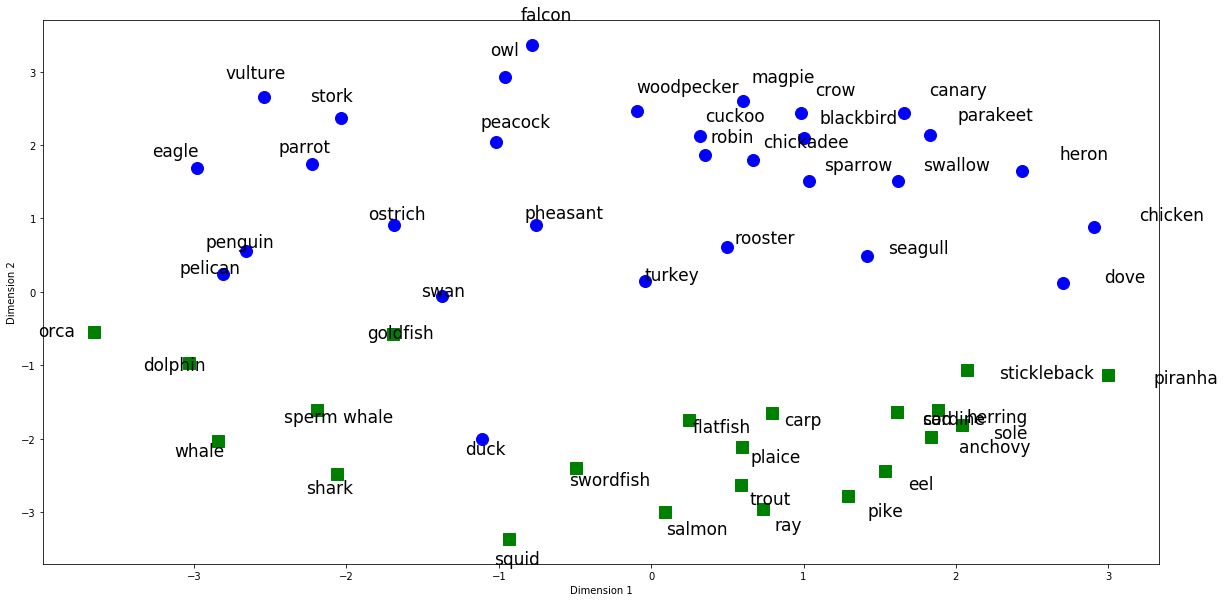

In [10]:
from sklearn.manifold import MDS

embedding = MDS(n_components=2)
F_lowdim = embedding.fit_transform(F)

birdinds = np.where(labels==0)
fishinds = np.where(labels==1)

fig = plt.figure(figsize=(20, 10))
plt.plot(F_lowdim[birdinds,0],F_lowdim[birdinds,1],'bo',markersize=12)
plt.plot(F_lowdim[fishinds,0],F_lowdim[fishinds,1],'gs',markersize=12)

for i in range(0,len(F)):
    plt.text(F_lowdim[i,0]*1.1,F_lowdim[i,1]*1.1,names[i],fontsize=17)
    
plt.xlabel('Dimension 1')    
plt.ylabel('Dimension 2')    

# plt.show()

### Tasks 1-3 [10 pts] 
**Task 1**: Evaluate each model by standard leave-one-animal-out cross validation. **[2 pts]**

**Task 2**: Implement two models of categorization: a prototype model **[2pts]** and an exemplar model **[2pts]**.

**Task 3**: Report predictive accuracy of each model in percentage (i.e. % correct predictions out of 53 animals). **[1 pt]**

**Task 4**: Perform an error analysis on the two models (i.e. report which exemplars each model failed on), then compare and discuss why the errors look the way they do. **[3 pts]**


**Hint:** Consider using the following wrapper code for performing the leave-one-out (LOO) cross validation.

You may also want to refer to description and example code here: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

In [11]:
def prototypeModelPredictLabel(F_train, F_test, labels_train):
    distList, distToBirdList, distToFishList = [], [], []
    for index in range(len(F_train)):
        eDist = spatial.distance.euclidean(F_train[index], F_test)
        if (labels_train[index] == 0):
            distToBirdList = np.append(distToBirdList, eDist)
        else:
            distToFishList = np.append(distToFishList, eDist)
        distList = np.append(distList, eDist)
    birdOrFish = 0 if distToBirdList.mean() < distToFishList.mean() else 1
    return [birdOrFish, distList, distToBirdList, distToFishList]

def exemplarModelPredictLabel(F_train, F_test, labels_train):
    distList, distToBirdList, distToFishList = [], [], []
    for index in range(len(F_train)):
        eDist = spatial.distance.euclidean(F_train[index], F_test)
        similarity = np.exp(eDist**2)
        if (labels_train[index] == 0):
            distToBirdList = np.append(distToBirdList, similarity)
        else:
            distToFishList = np.append(distToFishList, similarity)
        distList = np.append(distList, eDist)
    birdOrFish = 0 if distToBirdList.mean() < distToFishList.mean() else 1
    return [birdOrFish, distList, distToBirdList, distToFishList]
    
def calculateProbability(correctAnswerList, predicatedAnswerList):
    numOfCorrect = 0
    for i in range(len(correctAnswerList)):
        if (correctAnswerList[i] == predicatedAnswerList[i]):
            numOfCorrect += 1
    return numOfCorrect / len(correctAnswerList)


Prototype Predicitive Accuracy:  0.9622641509433962 %
Exemplar Predicitive Accuracy:  0.9245283018867925 %


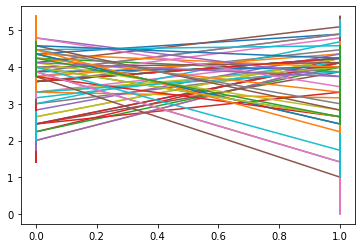

In [15]:
loo = LeaveOneOut()
loo.get_n_splits(F)

pModelLabels = []
eModelLabels = []
correctLabels = []
for train_index, test_index in loo.split(F):
#     ...... your code here ......
#     1) Get training and testing data points
    F_train, F_test = F[train_index], F[test_index]
    labels_train, labels_test = labels[train_index], labels[test_index]
    correctLabels = np.append(correctLabels, labels_test)
    
#     2.1) Implement and predict with prototype model
    [birdOrFish, distList, distToBirdList, distToFishList] = prototypeModelPredictLabel(F_train, F_test, labels_train)
    pModelLabels = np.append(pModelLabels, birdOrFish)
    
        
    plt.plot(labels_train, distList)
    
#     2.2) Implement and predict with exemplar model
    [birdOrFish, distList, distToBirdList, distToFishList] = exemplarModelPredictLabel(F_train, F_test, labels_train)
    eModelLabels = np.append(eModelLabels, birdOrFish)

# 3) Report predictive accuracies (%)
prototypeProbability = calculateProbability(correctLabels, pModelLabels)
print ("Prototype Predicitive Accuracy: ", prototypeProbability, "%")

exemplarProbability = calculateProbability(correctLabels, eModelLabels)
print ("Exemplar Predicitive Accuracy: ", exemplarProbability, "%")

In [13]:
# 4) Perform an error analysis on the two models 
# (i.e. report which exemplars each model failed on), 
# then compare and discuss why the errors look the way they do. [3 pts]

Export and submit a **fully executable** Python Jupyter Notebook and a PDF copy of your notebook showing all results. 